<a href="https://colab.research.google.com/github/njonou65/UE-INF3236/blob/main/groupe_7_TP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import truncnorm
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pickle

import numpy as np
from scipy.stats import truncnorm
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pickle

/tmp/ipykernel_39049/1457342821.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  ax.plot(3.5, 1.8, "or",


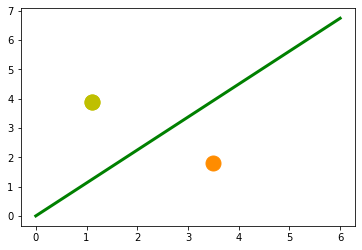

In [ ]:
# l'objectif est de mettre en place un separteur lineaire pour pour separer les donnees qui sont lineairemnt separables
#On distingue deux classes a priori
# en d'autres termes on veut mettre en place un modele de classification base sur un separateur lineaire

X = np.arange(0, 7)
fig, ax = plt.subplots()
ax.plot(3.5, 1.8, "or",
color="darkorange",
markersize=15)
ax.plot(1.1, 3.9, "oy",
markersize=15)
point_on_line = (4, 4.5)
ax.plot(1.1, 3.9, "oy", markersize=15)

#On calcule la pente

m = point_on_line[1] / point_on_line[0]
ax.plot(X, m * X, "g-", linewidth=3)
plt.show()


In [ ]:
#On prend deux points et leur donne des coordonnees aleatoires et on veut verrifier si ils sont au dessus en dessous ou sur le separateur
lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4
# verifions si orenge est en dessous du separateur,

print(orange[0] * m - orange[1])
# verifions si lemon est au dessus du separateur

print(lemon[0] * m - lemon[1])


# on as une valeur positive pour orange donc il es situer au dessus du separateur
# on as une valeur negative pour lemon donc il es situer au en dessous du separateur

2.1375
-2.6624999999999996


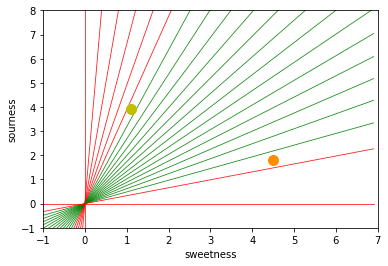

In [ ]:
# ici on cherche a trouver la meilleur separation qui sera tel que pour un point quelconque on sache sa classe


import numpy as np
import matplotlib.pyplot as plt

def create_distance_function(a, b, c):
    """ 0 = ax + by + c """
    def distance(x, y):
        """
        on retourne un  tuple (d, pos)
        d  distance

        si pos == -1 le point  dessous du separateur,
        0 sur le separateur et +1 au dessus
        """
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom<0 and b<0) or (nom>0 and b>0):
            pos = -1
        else:
            pos = 1
        return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)
    return distance
orange = (4.5, 1.8)
lemon = (1.1, 3.9)
fruits_coords = [orange, lemon]
fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)
step = 0.05
for x in np.arange(0, 1+step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    Y = slope * X
    results = []
    for point in fruits_coords:
        results.append(dist4line1(*point))
    if (results[0][1] != results[1][1]):
        ax.plot(X, Y, "g-", linewidth=0.8, alpha=0.9)
    else:
        ax.plot(X, Y, "r-", linewidth=0.8, alpha=0.9)
size = 10
for (index, (x, y)) in enumerate(fruits_coords):
    if index== 0:
        ax.plot(x, y, "o",color="darkorange", markersize=size)
     
    else:
        ax.plot(x, y, "oy",markersize=size)
plt.show()


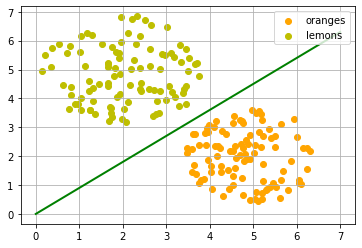

In [ ]:
# On decuple le nombre de points(Elements) de chaques classes
import numpy as np
import matplotlib.pyplot as plt

def points_within_circle(radius,center=(0, 0),number_of_points=100):
    
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y
X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)

ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label="lemons")
ax.plot(X, 0.9 * X, "g-", linewidth=2)
ax.legend()
ax.grid()
plt.show()


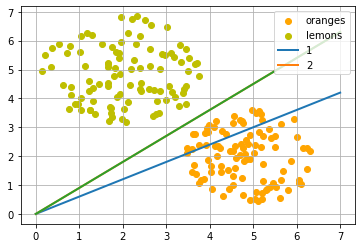

0.8999999999999999


In [ ]:
#en ayant decupler le nombre de points(Elements)de chaque classes on constate que le separateur effectue toujours la meilleur separation
#on ecrit donc un programme qui vas nous permettre d'ajuster  le separateur de maniere dynamique.

import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from random import shuffle

X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label="lemons")
fruits = list(zip(oranges_x,oranges_y,repeat(0, len(oranges_x))))
fruits += list(zip(lemons_x,lemons_y,repeat(1, len(oranges_x))))
shuffle(fruits)

# fonction d'ajustement

def adjust(learning_rate=0.3, slope=0.3):
    line = None
    counter = 0
    for x, y, label in fruits:
        res = slope * x - y
        #print(label, res)
        if label == 0 and res < 0:
            # le point est en desspous du separteur mais doit etre au dessus
            # => on incremente la pente pour ajuster
            slope += learning_rate
            counter += 1
            ax.plot(X, slope * X,linewidth=2, label=str(counter))
        elif label == 1 and res > 0:
            # le point est au dessus de la pente mais doit etre au dessus 
            # =>on decrement la pente
            #print(res, label)
            slope -= learning_rate
            counter += 1
            ax.plot(X, slope * X,linewidth=2, label=str(counter))
    return slope
slope = adjust()
ax.plot(X,slope * X,linewidth=2)
ax.legend()
ax.grid()
plt.show()
print(slope)


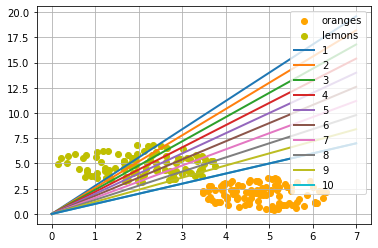

0.9999999999999996


In [ ]:
# on teste avec pente de depart differente

X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label="lemons")
slope = adjust(learning_rate=0.2, slope=3)
ax.plot(X,slope * X,linewidth=2)
ax.legend()
ax.grid()
plt.show()
print(slope)

# Reseau de neurones simple

In [ ]:
# on souhaite mettre en place un reseau de neuronne qui calcule les poids automatiquement durant la phase de test 
#on debute avec w1= -0.45 et w2= 0.5 
#on ajuste les poids pour creer une separateur


import numpy as np

#on definit une classe perceptron 
class Perceptron:
#une methode inite pour definire les entres

    def __init__(self, weights):
        """
        'weights(poids)' peuvent etres des vecteurs numpy,des  listes ou des tuples pour
        les valeurs actuel des poids.

        """
        self.weights = np.array(weights)
    
    
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return weighted_sum

p = Perceptron(weights=[-0.45, 0.5])

for point in zip(oranges_x[:10], oranges_y[:10]):
    res = p(point)
    print(res, end=", ")
for point in zip(lemons_x[:10], lemons_y[:10]):
    res = p(point)
    print(res, end=", ")

-1.0393516885633294, -0.93835169060476, -0.4893742756244359, -0.33848890489739203, -1.7453969093920367, -0.26687477416504013, -1.9652725110874236, -1.0910100033778904, -0.9682826902616666, -0.8546598515673987, 1.2332782139959635, 1.595483282488713, 2.055347596736889, 1.3747551057434941, 0.6608897931481461, 0.7477668115614051, 1.198560679364118, 1.4573444064557015, 2.559562885228037, 2.379309657761703, 

In [ ]:
# on observe des valeurs positives (les points classes comme orange),et des valeurs negatives des points classe comme lemon
#on peut calculer la precision de notre perceptron
from collections import Counter
evaluation = Counter()
for point in zip(oranges_x, oranges_y):
    res = p(point)
    if res < 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1
for point in zip(lemons_x, lemons_y):
    res = p(point)
    if res >= 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1
print(evaluation)


Counter({'corrects': 200})


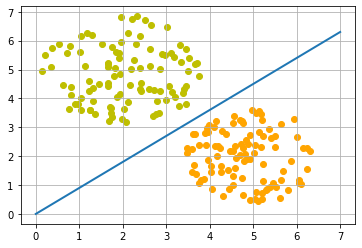

0.9


In [ ]:
import time
import matplotlib.pyplot as plt
slope = 0.1
X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label="lemons")
slope = 0.45 / 0.5
ax.plot(X, slope * X, linewidth=2)
ax.grid()
plt.show()
print(slope)

# Entrainement du neurone

In [ ]:
# on souhaite entrainner le reseau de neurone, 

from sklearn.model_selection import train_test_split
import random
oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))

# on fixe les etiquette 0 oranges  et 1 pour lemons 
labelled_data = list(zip(oranges + lemons,[0] * len(oranges) + [1] * len(lemons)))

#on definit des valeurs d'exemples aleatoirepour constituer notre datset

random.shuffle(labelled_data)
data, labels = zip(*labelled_data)

#on definit la tailledu train_test et du test_set

res = train_test_split(data, labels,train_size=0.8,test_size=0.2,random_state=42)
train_data, test_data, train_labels, test_labels = res
print(train_data[:10], train_labels[:10])

[(2.9781001036749535, 5.490668337491293), (3.128092979795996, 4.2386448399586145), (3.45788659060437, 5.72497179073116), (2.407385580735614, 6.144438399083367), (0.8038009182753416, 4.402054963172858), (5.11354662910471, 0.4362907080295544), (2.657708037413654, 6.558383908010046), (4.749384364999553, 3.2243861367586506), (5.675274987194553, 1.4814913255016702), (0.38333190466730027, 5.738785308205294)] [1, 1, 1, 1, 1, 0, 1, 0, 0, 1]


In [ ]:
# a present nous essayons de corriger les poids automatiquemnt afin de reduire les erreurs 
# de ce fait nous allons ajouter une fonction 'adjust' pour la correction

import numpy as np
from collections import Counter

class Perceptron:
    def __init__(self,weights,learning_rate=0.1):
        """
    
            'weights(poids)' peuvent etres des vecteurs numpy,des  listes ou des tuples pour
            les valeurs actuel des poids.
    """
        self.weights = np.array(weights)
        self.learning_rate = learning_rate

    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        else:
            return 1
    
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        #print(in_data, weighted_input, weighted_sum)
        return Perceptron.unit_step_function(weighted_sum)

    def adjust(self,target_result,calculated_result,in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data) 
            error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction
            #print(target_result, calculated_result, error, in_data, correction, self.weights)
        
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation

p = Perceptron(weights=[0.1, 0.1],learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index],p(train_data[index]),train_data[index])
    
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())
print(p.weights)


[('correct', 160)]
[('correct', 40)]
[-2.34274392  2.29763734]


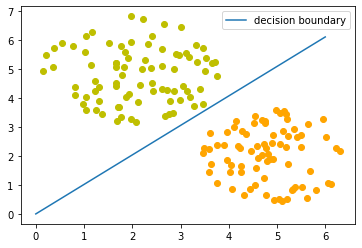

[-2.34274392  2.29763734]


In [ ]:
#on visualise kla frontiere d decision de notre perceptron
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig, ax = plt.subplots()
lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)
ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")
w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

5 -46.42905192440607 [-1.43406399 -0.03088721] (5.11354662910471, 0.4362907080295544)
6 0.32879396077150563 [-0.63675158  1.93662796] (2.657708037413654, 6.558383908010046)
7 2.1268349447700654 [-2.06156689  0.96931212] (4.749384364999553, 3.2243861367586506)
17 0.5999844891597298 [-1.21042525  2.01742757] (2.8371387992955888, 3.493718154640542)
30 1.9414391581836683 [-2.29497865  1.18210176] (3.615178023620941, 2.7844193366309953)
39 0.44363616030738895 [-1.30174337  2.93425894] (3.310784289000796, 5.840523904607762)
41 1.019631725249545 [-2.34274392  2.29763734] (3.470001850682399, 2.1220719929420593)


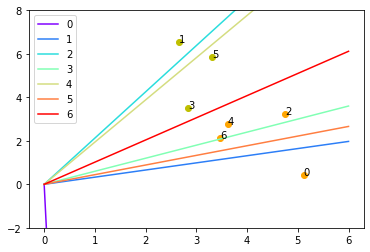

In [ ]:
# on visualise les mouvements
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
p = Perceptron(weights=[0.1, 0.1],learning_rate=0.3)
number_of_colors = 7
colors = cm.rainbow(np.linspace(0, 1, number_of_colors))
fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2, 8])
counter = 0
for index in range(len(train_data)):
    old_weights = p.weights.copy()
    p.adjust(train_labels[index],p(train_data[index]),train_data[index])
    if not np.array_equal(old_weights, p.weights):
        color = "orange" if train_labels[index] == 0 else"y"

        ax.scatter(train_data[index][0],train_data[index][1],color=color)
        ax.annotate(str(counter),(train_data[index][0], train_data[index][1]))
        m = -p.weights[0] / p.weights[1]
        print(index, m, p.weights, train_data[index])
        ax.plot(X, m * X, label=str(counter), color=colors[counter])
        counter += 1
ax.legend()
plt.show()

# RESEAU DE NEURONES SIMPLE

[]

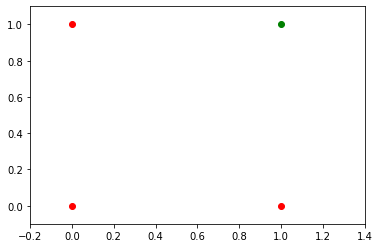

In [ ]:
# on essaye de voir comment separer lineairement des donnees comme ceux ci
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
#ax.plot(X, m * X + 1.2, label="decision boundary")
plt.plot()

[]

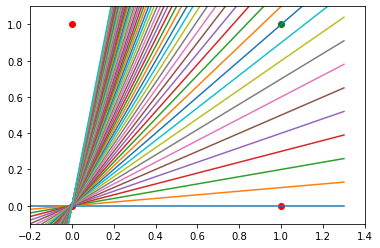

In [ ]:
# on essaye de separer commeavec le prerceptron vue precedament
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
for m in np.arange(0, 6, 0.1):
    ax.plot(X, m * X )
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
plt.plot()

# on se rendra compte qu'aucun ajustement de droite ne parvient a separer les differents points

[]

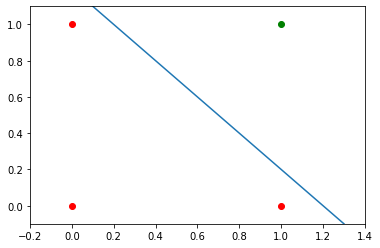

In [ ]:
# on vas utiliser un separateur lineaire pour notre probleme

import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m, c = -1, 1.2
ax.plot(X, m * X + c )
plt.plot()


In [ ]:
import numpy as np
from collections import Counter
class Perceptron:
    def __init__(self,weights,bias=1,learning_rate=0.3):
        """
        
            'weights(poids)' peuvent etres des vecteurs numpy,des  listes ou des tuples pour
            les valeurs actuel des poids.
    """
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = learning_rate

@staticmethod
def unit_step_function(x):
    if x <= 0:
        return 0
    else:
        return 1
    
def __call__(self, in_data):
    in_data = np.concatenate( (in_data, [self.bias]) )
    result = self.weights @ in_data
    return Perceptron.unit_step_function(result)
def adjust(self,target_result,in_data):
    if type(in_data) != np.ndarray:
        in_data = np.array(in_data) #calculated_result = self(in_data)
        error = target_result - calculated_result
    if error != 0:
        in_data = np.concatenate( (in_data, [self.bias]) )
        correction = error * in_data * self.learning_rate
        self.weights += correction
def evaluate(self, data, labels):
    evaluation = Counter()
    for sample, label in zip(data, labels):
        result = self(sample) # predict
        if result == label:
            evaluation["correct"] += 1
        else:
            evaluation["wrong"] += 1
    return evaluation



In [ ]:
import numpy as np
from perceptrons import Perceptron
def labelled_samples(n):
    for _ in range(n):
        s = np.random.randint(0, 2, (2,))
        yield (s, 1) if s[0] == 1 and s[1] == 1 else (s, 0)
p = Perceptron(weights=[0.3, 0.3, 0.3],learning_rate=0.2)
for in_data, label in labelled_samples(30):
    p.adjust(label,in_data)
test_data, test_labels = list(zip(*labelled_samples(30)))
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

NameError: name 'null' is not defined

In [ ]:
# on introduit un biais pour la separation

from sklearn.datasets import make_blobs
n_samples = 250
samples, labels = make_blobs(n_samples=n_samples,centers=([2.5, 3], [6.7, 7.9]),random_state=0)

In [ ]:
# on visualise le dataset quenous avons generer aleatoirement
import matplotlib.pyplot as plt
colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1],c=colours[n_class], s=40, label=str(n_class))


In [ ]:
n_learn_data = int(n_samples * 0.8) # 80 % of available data points
learn_data, test_data = samples[:n_learn_data], samples[-n_learn_data:]
learn_labels, test_labels = labels[:n_learn_data], labels[-n_learn_data:]

from perceptrons import Perceptron
p = Perceptron(weights=[0.3, 0.3, 0.3],learning_rate=0.8)
for sample, label in zip(learn_data, learn_labels):
    p.adjust(label,sample)
evaluation = p.evaluate(learn_data, learn_labels)
print(evaluation)

In [ ]:
# on visualise la frontiere de decision

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# plotting learn data
colours = ('green', 'blue')
for n_class in range(2):
    ax.scatter(learn_data[learn_labels==n_class][:, 0],learn_data[learn_labels==n_class][:, 1],c=colours[n_class], s=40, label=str(n_class))
    # plotting test data
    colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(test_data[test_labels==n_class][:, 0],test_data[test_labels==n_class][:, 1],c=colours[n_class], s=40, label=str(n_class))
X = np.arange(np.max(samples[:,0]))
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()
plt.show()

In [ ]:
#on etent la porte logique AND avec des valeurs flotentes
from perceptrons import Perceptron
p = Perceptron(weights=[0.3, 0.3, 0.3],bias=1,learning_rate=0.2)
def labelled_samples(n):
    for _ in range(n):
        s = np.random.random((2,))
        yield (s, 1) if s[0] >= 0.5 and s[1] >= 0.5 else (s, 0)
for in_data, label in labelled_samples(30):p.adjust(label,n_data)
test_data, test_labels = list(zip(*labelled_samples(60)))
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

IndexError: index 2 is out of bounds for axis 0 with size 2

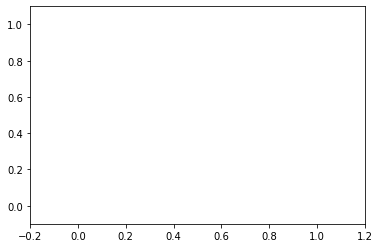

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[2] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")


In [ ]:
from perceptrons import Perceptron
import numpy as np
from collections import Counter
def labelled_samples(n):
    for _ in range(n):
        s = np.random.random((2,))
        yield (s, 0) if s[0] < 0.5 else (s, 1)
p = Perceptron(weights=[0.3, 0.3, 0.3],learning_rate=0.4)
for in_data, label in labelled_samples(300):
    p.adjust(label,in_data)
test_data, test_labels = list(zip(*labelled_samples(500)))
print(p.weights)
p.evaluate(test_data, test_labels)

In [ ]:
#on s'interessse aux reseau a plusieurs couches
import numpy as np
#on initialise les entre des couches
input_vector = np.array([2, 4, 11])
print(input_vector)


[ 2  4 11]


In [ ]:
import numpy as np
input_vector = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print("les vecteurs en entrer:\n", input_vector)
print("la dim  de ces vecteurs: ", input_vector.shape)

les vecteurs en entrer:
 [[ 2]
 [ 4]
 [11]]
la dim  de ces vecteurs:  (3, 1)


In [ ]:
import numpy as np
number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)

True


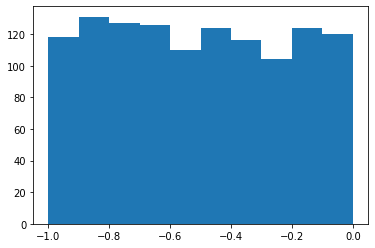

In [ ]:
print(np.all(s >= -1) and np.all(s < 0))
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()

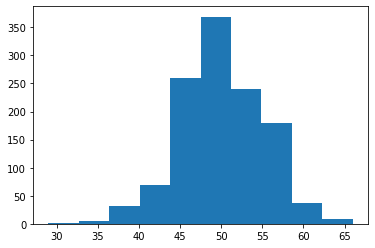

In [ ]:
#fonction a loiebinomiale
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()


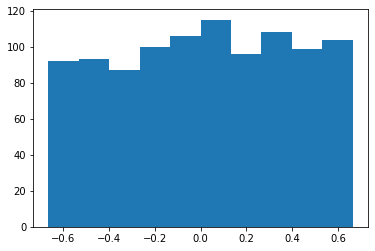

In [ ]:
from scipy.stats import truncnorm
s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)
plt.hist(s)
plt.show()

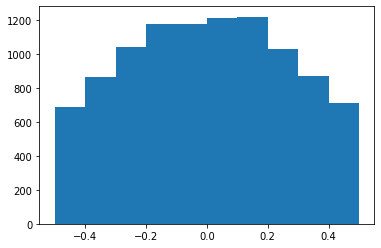

In [ ]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)
plt.hist(s)
plt.show()

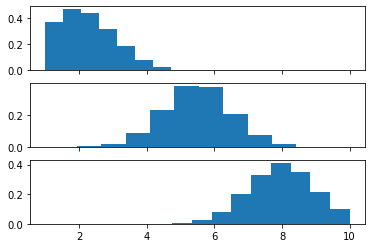

In [ ]:
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), density=True)
ax[1].hist(X2.rvs(10000), density=True)
ax[2].hist(X3.rvs(10000), density=True)
plt.show()


In [ ]:
no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes))
wih

array([[-0.47652372,  0.46607044, -0.1528131 ],
       [-0.07570314,  0.10977055,  0.21849816],
       [-0.09328379,  0.04811891, -0.48848686],
       [ 0.36862995,  0.37006564, -0.100453  ]])

In [ ]:
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes) # this is the input in this layer!
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who


array([[ 0.04220206,  0.3725212 ,  0.30003427, -0.12547794],
       [ 0.03016318,  0.299984  , -0.16597207, -0.32194441]])

In [ ]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low-mean)/sd, (upp-mean)/sd, loc=mean, scale=sd)

In [ ]:
#Construction de notre classe de reseau de neurone.
class NeuralNetwork:
    
    def __init__(self, input_nodes, output_nodes, hidden_nodes, learning_rate):
        self.input_nodes=input_nodes
        self.output_nodes=output_nodes
        self.hidden_nodes=hidden_nodes
        self.learning_rate=learning_rate
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.input_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.hidden_nodes, self.input_nodes))
        rad = 1 / np.sqrt(self.hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.output_nodes, self.hidden_nodes))
        
    def train(self):
        pass
    def run(self):
        pass
simple_network=NeuralNetwork(input_nodes=6, output_nodes=4, hidden_nodes=8, learning_rate=0.1)
print(simple_network.weights_in_hidden)
print(simple_network.weights_hidden_out)

[[-0.22832255  0.05126963  0.25279064 -0.13178209  0.04737273 -0.12949088]
 [-0.00846243 -0.3826605   0.26365077  0.17598907 -0.07387674  0.29797709]
 [-0.28900753 -0.28107689 -0.13028469 -0.35638213  0.00836641  0.07551892]
 [-0.3857456  -0.04419     0.12878102 -0.13635877 -0.26286176 -0.3820614 ]
 [ 0.22289922  0.08772848 -0.19770105 -0.18366856 -0.22428617  0.40815818]
 [ 0.27368985 -0.05587692 -0.37597498 -0.14173417 -0.37754216  0.32817032]
 [ 0.21591345 -0.30932009  0.18880464  0.2495963   0.11832131 -0.38309026]
 [-0.17825162  0.39097322  0.1935164  -0.28020518 -0.11365337 -0.06981878]]
[[-0.02622767 -0.20706261  0.27903758  0.12936328  0.02765521 -0.28564212
   0.03545862 -0.02677718]
 [-0.21139051 -0.04207979  0.29901757 -0.22564231 -0.12666931  0.04977114
   0.29091251  0.03999019]
 [ 0.22290811  0.05244931  0.24574318  0.14425379  0.33228979  0.21175082
   0.00629364 -0.18583221]
 [-0.22755172  0.0371715   0.10248815 -0.10523392 -0.22497434  0.34896618
  -0.11347431  0.25557

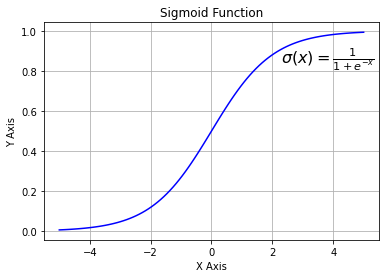

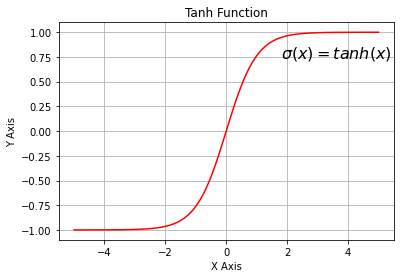

In [ ]:
#Définition de la fonction sigmoïde qui permet de transformer les 
#valeurs des données en des valeurs comprise entre 0 et 1 permettant 
#ainsi de ranger les données par ordre d'importance, ainsi plus une valeurs
#est proche de 1 plus la données correspondante est importante.
def sigma(x):
    return 1 / (1 + np.exp(-x))
#Définition de la fonction tangebte hyperbolique qui permet de transformer les 
#valeurs des données en des valeurs comprise entre -1 et 1 permettant 
#ainsi de réduire la taille des données.
def tanh(x):
    return np.tanh(x)
#initialisation et représentation des difféentes fonctions
X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.show()
plt.plot(X, tanh(X),'r')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Tanh Function')
plt.grid()
plt.text(1.8, 0.74, r'$\sigma(x)=tanh(x)$', fontsize=16)
plt.show()

In [ ]:
#La fonction expit de la librairie scipy.special est une illustration de la fonction sigmoïde.
from scipy.special import expit
print(expit(6.4))
print(expit([5, 12, -1]))
print(expit(np.array([0.8, 2.3, 8])))

0.9983411989198255
[0.99330715 0.99999386 0.26894142]
[0.68997448 0.90887704 0.99966465]


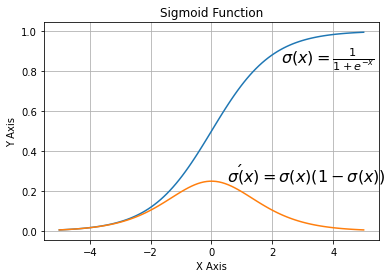

In [ ]:
plt.plot(X, sigma(X))
plt.plot(X, sigma(X) * (1 - sigma(X)))
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.text(0.5, 0.25, r'$\sigma\'(x) = \sigma(x)(1 - \sigma(x))$', fontsize=16)
plt.show()


In [ ]:
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
sigmoid([3, 4, 5])

array([0.95257413, 0.98201379, 0.99330715])

In [ ]:
def ReLU(x):
    return np.maximum(0.0, x)
def ReLU_derivation(x):
    if x <= 0:
        return 0
    else:
        return 1

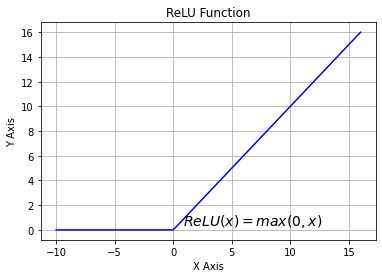

In [ ]:
X = np.linspace(-10, 16, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(0.8, 0.4, r'$ReLU(x)=max(0, x)$', fontsize=14)
plt.show()

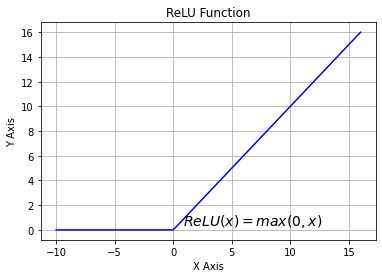

In [ ]:
X = np.linspace(-10, 16, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(0.8, 0.4, r'$ReLU(x)=max(0, x)$', fontsize=14)
plt.show()

In [ ]:
from scipy.special import expit as activation_function
class NeuralNetwork():
    
    def __init__(self, input_nodes, output_nodes, hidden_nodes, learning_rate):
        self.input_nodes=input_nodes
        self.output_nodes=output_nodes
        self.hidden_nodes=hidden_nodes
        self.learning_rate=learning_rate
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.input_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.hidden_nodes, self.input_nodes))
        rad = 1 / np.sqrt(self.hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.output_nodes, self.hidden_nodes))
        
    def train(self, input_vector, target_vector):
        pass
    def run(self, input_vector):
        input_vector = np.array(input_vector, ndmin=2).T
        input_hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector = activation_function(self.weights_hidden_out @ input_hidden)
        return output_vector


simple_network=NeuralNetwork(input_nodes=2, output_nodes=2, hidden_nodes=4, learning_rate=0.6)
simple_network.run([(6, 4)])

array([[0.50917225],
       [0.29779361]])

In [ ]:
class NeuralNetwork():
    
    def __init__(self, input_nodes, output_nodes, hidden_nodes, learning_rate):
        self.input_nodes=input_nodes
        self.output_nodes=output_nodes
        self.hidden_nodes=hidden_nodes
        self.learning_rate=learning_rate
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.input_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.hidden_nodes, self.input_nodes))
        rad = 1 / np.sqrt(self.hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.output_nodes, self.hidden_nodes))
        
    def train(self, input_vector, target_vector):
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        target_vector = np.array(target_vector).reshape(target_vector.size, 1)
        output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
        output_error = target_vector - output_vector_network
        tmp = output_error * output_vector_network * (1.0 - output_vector_network)
        self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
        hidden_errors = self.weights_hidden_out.T @ output_error
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        self.weights_in_hidden += self.learning_rate * (tmp @ input_vector.T)

    def run(self, input_vector):
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        input4hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
        return output_vector_network

    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i].argmax():
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

In [ ]:
from sklearn.datasets import make_blobs
n_samples = 500
blob_centers = ([2, 6], [6, 2], [7, 7])
n_classes = len(blob_centers)
data, labels = make_blobs(n_samples=n_samples, centers=blob_centers, random_state=7)

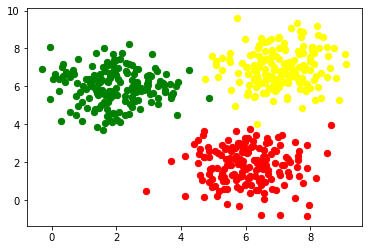

In [ ]:
colours = ('green', 'red', "yellow")
fig, ax = plt.subplots()
for n_class in range(n_classes):
    ax.scatter(data[labels==n_class][:, 0],
    data[labels==n_class][:, 1],
    c=colours[n_class],
    s=40,
    label=str(n_class))

In [ ]:
labels[:5]


array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
labels = np.arange(n_classes) == labels.reshape(labels.size, 1)
labels = labels.astype(np.float)
labels[:7]

/tmp/ipykernel_39049/2225295370.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = labels.astype(np.float)


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
res = train_test_split(data, labels,
train_size=0.8,
test_size=0.2,
random_state=42)
train_data, test_data, train_labels, test_labels = res
train_labels[:10]

ValueError: Found input variables with inconsistent numbers of samples: [795, 3180]

In [ ]:
simple_network = NeuralNetwork(input_nodes=2, output_nodes=3, hidden_nodes=5, learning_rate=0.3)
for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])
    
simple_network.evaluate(train_data, train_labels)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 2)

In [ ]:
class NeuralNetwork():  
    def __init__(self, input_nodes, output_nodes, hidden_nodes, learning_rate, bias=None):
        self.input_nodes=input_nodes
        self.output_nodes=output_nodes
        self.hidden_nodes=hidden_nodes
        self.learning_rate=learning_rate
        self.bias=bias
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        bias_node = 1 if self.bias else 0
        rad = 1 / np.sqrt(self.input_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.hidden_nodes, self.input_nodes + bias_node))
        rad = 1 / np.sqrt(self.hidden_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.output_nodes, self.hidden_nodes + bias_node))
        
    def train(self, input_vector, target_vector):
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size,1)
        if self.bias:
            input_vector = np.concatenate( (input_vector, [[self.bias]]))
        target_vector = np.array(target_vector).reshape(target_vector.size, 1)
        output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
        if self.bias:
            output_vector_hidden = np.concatenate( (output_vector_hidden, [[self.bias]]) )
        output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
        output_error = target_vector - output_vector_network
        tmp = output_error * output_vector_network * (1.0 - output_vector_network)
        self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
        hidden_errors = self.weights_hidden_out.T @ output_error
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        if self.bias:
            x = (tmp @input_vector.T)[:-1,:]
        else:
            x = tmp @ input_vector.T
        self.weights_in_hidden += self.learning_rate * x
        
    def run(self, input_vector):
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        if self.bias:
            input_vector = np.concatenate( (input_vector, [[1]]))
        input4hidden = activation_function(self.weights_in_hidden @ input_vector)
        if self.bias:
            input4hidden = np.concatenate((input4hidden, [[1]]))
        output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
        return output_vector_network
                                           
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i].argmax():
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs


In [ ]:
simple_network = NeuralNetwork(input_nodes=2, output_nodes=3, hidden_nodes=5, learning_rate=0.1, bias=1)
for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])
simple_network.evaluate(train_data, train_labels)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 3)

In [ ]:
c = np.loadtxt("strange_flowers.txt", delimiter=" ")
data = c[:, :-1]
n_classes = data.shape[1]
labels = c[:, -1]
data[:5]

array([[ 0.  ,  0.  , 10.  ,  1.25],
       [ 0.  ,  0.  , 11.  ,  1.21],
       [ 0.  ,  0.  ,  3.  ,  1.26],
       [ 0.  ,  0.  , 19.  ,  1.25],
       [ 0.  ,  0.  ,  4.  ,  1.24]])

In [ ]:
labels = np.arange(n_classes) == labels.reshape(labels.size, 1)
labels = labels.astype(np.float)
labels[:3]

/tmp/ipykernel_39049/3993681641.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = labels.astype(np.float)


array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
from sklearn import preprocessing
data = preprocessing.scale(data)
data[:5]
data.shape
labels.shape

(795, 4)

In [ ]:
from sklearn.model_selection import train_test_split
res = train_test_split(data, labels,
train_size=0.8,
test_size=0.2,
random_state=42)
train_data, test_data, train_labels, test_labels = res
train_labels[:10]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [ ]:
simple_network = NeuralNetwork(input_nodes=4, output_nodes=4, hidden_nodes=20, learning_rate=0.3)
for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])
simple_network.evaluate(train_data, train_labels)

(422, 214)

In [ ]:
#On repete plusieurs fois pour voir le modele qui a les plus bonnes performances